**Name:** Yutika Rege

**PRN:** 1901202012

**DS303:** Machine Learning 1

**Title:** Applications of data pre-processing on real world datasets.

**Problem Statement:** Read given Automobile dataset in Python environment. Apply appropriate pre-processing techniques and submit the cleaned data.

**Essential libraries and modules:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings("ignore")

**Exploratory data analysis:**

In [2]:
df = pd.read_csv('Automobile_data2.csv')

In [3]:
#name of columns

col_name = pd.DataFrame(df.columns, columns=["Column names"])
col_name

,Column names
0,Unnamed: 0
1,symboling
2,normalized-losses
3,make
4,fuel-type
5,aspiration
6,num-of-doors
7,body-style
8,drive-wheels
9,engine-location


In [4]:
# a new data frame "auto_df" to exclude the "Unnamed:0" column:

auto_df = df.iloc[:,1:]

In [5]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
#shape:

print(f"No. of rows   : {auto_df.shape[0]}\nNo. of columns: {auto_df.shape[1]}")

No. of rows   : 205
No. of columns: 26


**1) Missing value treatment:**

In [7]:
#variables with missing values:

miss_vals = pd.DataFrame(auto_df.isna().sum(),columns=["Count of missing values"])
miss_vals[miss_vals["Count of missing values"] > 0]

,Count of missing values
stroke,4
horsepower,2
peak-rpm,2
price,4


In [8]:
# all the rows with NaN values:

rows_w_na = auto_df[auto_df.isna().any(axis=1)]

In [9]:
print(f"There are {rows_w_na.shape[0]} rows with missing values.")

There are 10 rows with missing values.


In [10]:
missing_per = (auto_df.isna().sum().sum()/205)*100
print(f"There are {round(missing_per)} % missing values.")

There are 6.0 % missing values.


Since there are only 6% missing values, it would be most appropriate to drop these rows.

In [11]:
auto_df = auto_df.dropna()

In [12]:
missing_per_now = (auto_df.isna().sum().sum()/205)*100
print(f"There are {round(missing_per_now)} missing values.")

There are 0.0 missing values.


**2) Replacing "?" with NaN values. Then, either deleting or imputing these newly introduced NaN values:**

In [13]:
auto_df = auto_df.replace("?",np.nan) 

In [14]:
miss_vals_new = pd.DataFrame(auto_df.isna().sum(),columns=["Count of missing values"])
miss_vals_new[miss_vals_new["Count of missing values"] > 0]

,Count of missing values
normalized-losses,35
num-of-doors,2


In [15]:
print("Median for 'normalized-losses':",auto_df["normalized-losses"].median()) 

Median for 'normalized-losses': 114.0


In [16]:
# imputing the missing values of 'normalized-losses' with its median value:

def impute_normloss(x): 
    if pd.isnull(x): 
        return 114.0
    else: 
        return x 
auto_df["normalized-losses"]=auto_df["normalized-losses"].apply(impute_normloss)

**3) Data type conversion:**

In [17]:
auto_df["normalized-losses"]=pd.to_numeric(auto_df["normalized-losses"]) 
auto_df["bore"]=pd.to_numeric(auto_df["bore"]) 
auto_df["stroke"]=pd.to_numeric(auto_df["stroke"]) 
auto_df["horsepower"]=pd.to_numeric(auto_df["horsepower"]) 
auto_df["peak-rpm"]=pd.to_numeric(auto_df["peak-rpm"]) 
auto_df["price"]=pd.to_numeric(auto_df["price"]) 
auto_df["num-of-doors"]=auto_df["num-of-doors"].replace("two",2)
auto_df["num-of-doors"]=auto_df["num-of-doors"].replace("four",4) 

In [18]:
auto_df["num-of-doors"].unique()

array([ 2.,  4., nan])

In [19]:
print("Median for 'num-of-doors':",auto_df["num-of-doors"].median()) 

Median for 'num-of-doors': 4.0


In [20]:
auto_df["num-of-doors"]=auto_df["num-of-doors"].replace(np.nan,4) 

In [21]:
#checking for any remaining missing values:

auto_df.isna().sum().sum()

0

**4) Outlier treatment:**

[**Note:** For this purpose, we will only treat outliers for the variable 'Price']

Text(0.5, 1.0, "Outliers for 'Price'")

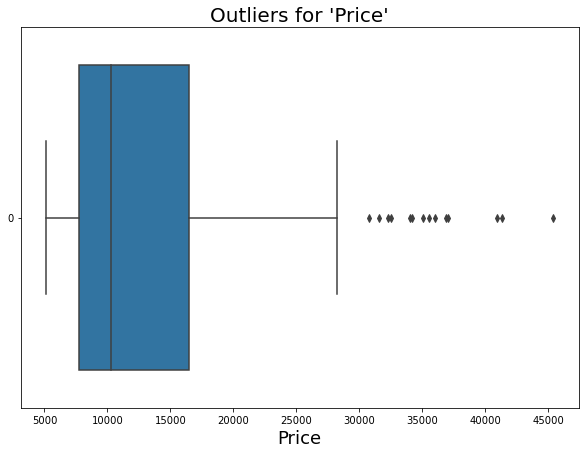

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(data=auto_df['price'],orient="h")
plt.xlabel('Price',size=18)
plt.title("Outliers for 'Price'",size=20)

**It seems as though the outliers for the variable 'Price' start from the $ 28,000 onwards. We shall remove those outliers.** 

In [23]:
auto_df = auto_df[auto_df["price"]<=28000]
auto_df.shape

(179, 26)

Text(0.5, 1.0, "Outliers for 'Price' Now")

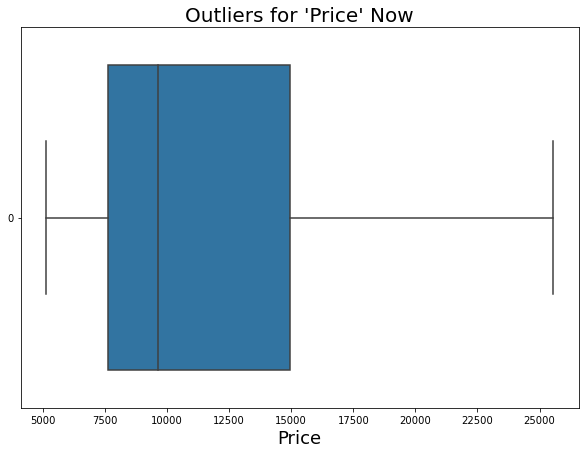

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(data=auto_df['price'],orient="h")
plt.xlabel('Price',size=18)
plt.title("Outliers for 'Price' Now",size=20)

**The outliers have been successfully omitted.**

**5) Encoding some categorical variables only:**

In [25]:
# to view the variables that are qualitative in nature and need to be encoded:

data_types = pd.DataFrame(auto_df.dtypes,columns=["Data type"])
data_types[data_types["Data type"]=="object"]

,Data type
make,object
fuel-type,object
aspiration,object
body-style,object
drive-wheels,object
engine-location,object
engine-type,object
num-of-cylinders,object
fuel-system,object


**i] Encoding the 'make' variable based on price and eventually dropping it:**

In [26]:
bins = (0,9000,15000,30000)
labels = ["low","medium","superior"]
auto_df["make-quality"] = pd.cut(x=auto_df["price"],bins=bins,labels=labels)

In [27]:
qual_make = pd.DataFrame(auto_df[["make","make-quality"]])
qual_make["make-quality"].value_counts()

low         80
medium      54
superior    45
Name: make-quality, dtype: int64

In [28]:
# we will use the 'LabelEncoder' method because 'make-quality' is of ordinal data type meaning- the qualities are comparable:

le = LabelEncoder()
auto_df["make-quality"]=le.fit_transform(auto_df["make-quality"])

In [29]:
auto_df=auto_df.drop(['make'], axis=1)

**Now we have the variable 'make-qualtity' in lieu of 'make', where make qualities have been encoded as follows:**

* **Medium = 1**

* **Superior = 2**

* **Low = 0**

**ii] Aspiration:**

In [30]:
auto_df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [31]:
# dummy encoding 'aspiration' since it is nominal meaning- the two types of aspirations are not comparable

auto_df["aspiration"]=pd.get_dummies(auto_df["aspiration"],drop_first=True) 

**The variable 'aspiration' has been dummy encoded successfully. The encoding is as follows:**

* **0 = std**

* **1 = turbo**

**We can thus encode all the categorical variables using these methods and many more such as OneHotEncoder, Binarizer etc. We shall now scale the data into a normal distribution.**

**6) Standardising the 'price' variable since it is our target variable:**

In [32]:
def z_score(x):
    s = np.std(x)
    m = np.mean(x)
    return (x-m)/s

In [33]:
auto_df['price'] = z_score(auto_df['price'])

**7) Display of sample preprocessed data:**

In [34]:
new_df = auto_df[['make-quality','aspiration','price']]
new_df.head(7)

,make-quality,aspiration,price
0,1,0,0.462545
1,2,0,1.096909
2,2,0,1.096909
3,1,0,0.558597
4,2,0,1.297456
5,2,0,0.833030
6,2,0,1.352343


**Comment:** The preprocessing has been applied to certain variables only so as to demonstrate its various techniques.